In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Imbalanced learning
from imblearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import (accuracy_score, f1_score, precision_score, 
                             recall_score, roc_auc_score, classification_report, 
                             confusion_matrix, roc_curve, precision_recall_curve)

In [2]:
df = pd.read_csv('BANGLADESH_13.csv')
# Rename columns
rename_dict = {
    "CR7": "q1", "CR10": "q2", "CR14": "q3", "CR5": "q4", "CR9": "q5",
    "CR13": "q6", "CR39": "q7", "CR40": "q8", "CR1": "q9", "CR2": "q10",
    "CR19": "q11", "CR20": "q12", "CR21": "q13", "CR22": "q14", "CR23": "q15",
    "CR24": "q16", "CR25": "q17", "CR30": "q18", "CR31": "q19", "CR32": "q20",
    "CR33": "q21", "CR34": "q22", "CR35": "q23", "CR36": "q24", "CR37": "q25",
    "CR38": "q26"
}

df = df[list(rename_dict.keys())].rename(columns=rename_dict).copy()

In [3]:
df['current_tobacco'] = np.where(
    ((df['q1'] == 1) & (df['q2'] == 2) & (df['q3'] == 2)),'no','yes')

df.drop(columns=['q1', 'q2','q3'], inplace=True)

df['Susceptibility'] = np.where(
    ((df['q7'] == 1) & (df['q8'] == 1) ),'non-susceptible','susceptible')

df.drop(columns=['q7', 'q8'], inplace=True)

df['tobacco_naive'] = np.where(
    ((df['q4'] == 2) & (df['q5'] == 2) & (df['q6'] == 2)),'no','yes')

df.drop(columns=['q4', 'q5','q6'], inplace=True)

In [4]:
mapping = {
    1: '13 or below', 2: '13 or below', 3: '13 or below',
    4: '14 years',
    5: '15 or above', 6: '15 or above', 7: '15 or above'
}

df['q9'] = df['q9'].map(mapping)

mapping = {
    1: 'Male',
    2: 'Female'
}

df['q10'] = df['q10'].map(mapping)

mapping = {
    1: 'No',
    2: 'Yes', 3: 'Yes', 4: 'Yes', 5: 'Yes'
}

df['q11'] = df['q11'].map(mapping)

mapping = {
    1: 'No',
    2: 'Yes', 3: 'Yes', 4: 'Yes', 5: 'Yes'
}

df['q12'] = df['q12'].map(mapping)

mapping = {
    1: 'No',
    2: 'Yes', 3: 'Yes', 4: 'Yes', 5: 'Yes'
}

df['q13'] = df['q13'].map(mapping)

mapping = {
    1: 'Yes',
    2: 'No'
}

df['q14'] = df['q14'].map(mapping)

mapping = {
    1: 'No',
    2: 'Yes', 3: 'Yes', 4: 'Yes'
}

df['q15'] = df['q15'].map(mapping)

mapping = {
    1: 'Yes',
    2: 'No'
}

df['q16'] = df['q16'].map(mapping)

mapping = {
    1: 'Yes',
    2: 'No'
}

df['q17'] = df['q17'].map(mapping)

mapping = {
    1: 'Yes',
    2: 'No'
}

df['q18'] = df['q18'].map(mapping)

mapping = {
    1: 'No',
    2: 'Yes',
    3 : 'No'
}

df['q19'] = df['q19'].map(mapping)

mapping = {
    1: 'Yes',
    2: 'Yes',
    3 : 'No'
}

df['q20'] = df['q20'].map(mapping)

mapping = {
    1: 'Yes',
    2: 'No',
    3 : 'No'
}

df['q21'] = df['q21'].map(mapping)

mapping = {
    1: 'No',
    2: 'Yes',
    3 : 'No'
}

df['q22'] = df['q22'].map(mapping)

mapping = {
    1: 'No',
    2: 'Yes',
    3 : 'No'
}

df['q23'] = df['q23'].map(mapping)

df['q27'] = np.where(
    ((df['q24'] == 3) & (df['q25'] == 2) & (df['q26'] == 2)),'no','yes')

df.drop(columns=['q24', 'q25','q26'], inplace=True)

In [5]:
df.head(2)

,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,current_tobacco,Susceptibility,tobacco_naive,q27
0,13 or below,Female,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,no,non-susceptible,no,yes
1,13 or below,Female,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,yes,susceptible,yes,yes


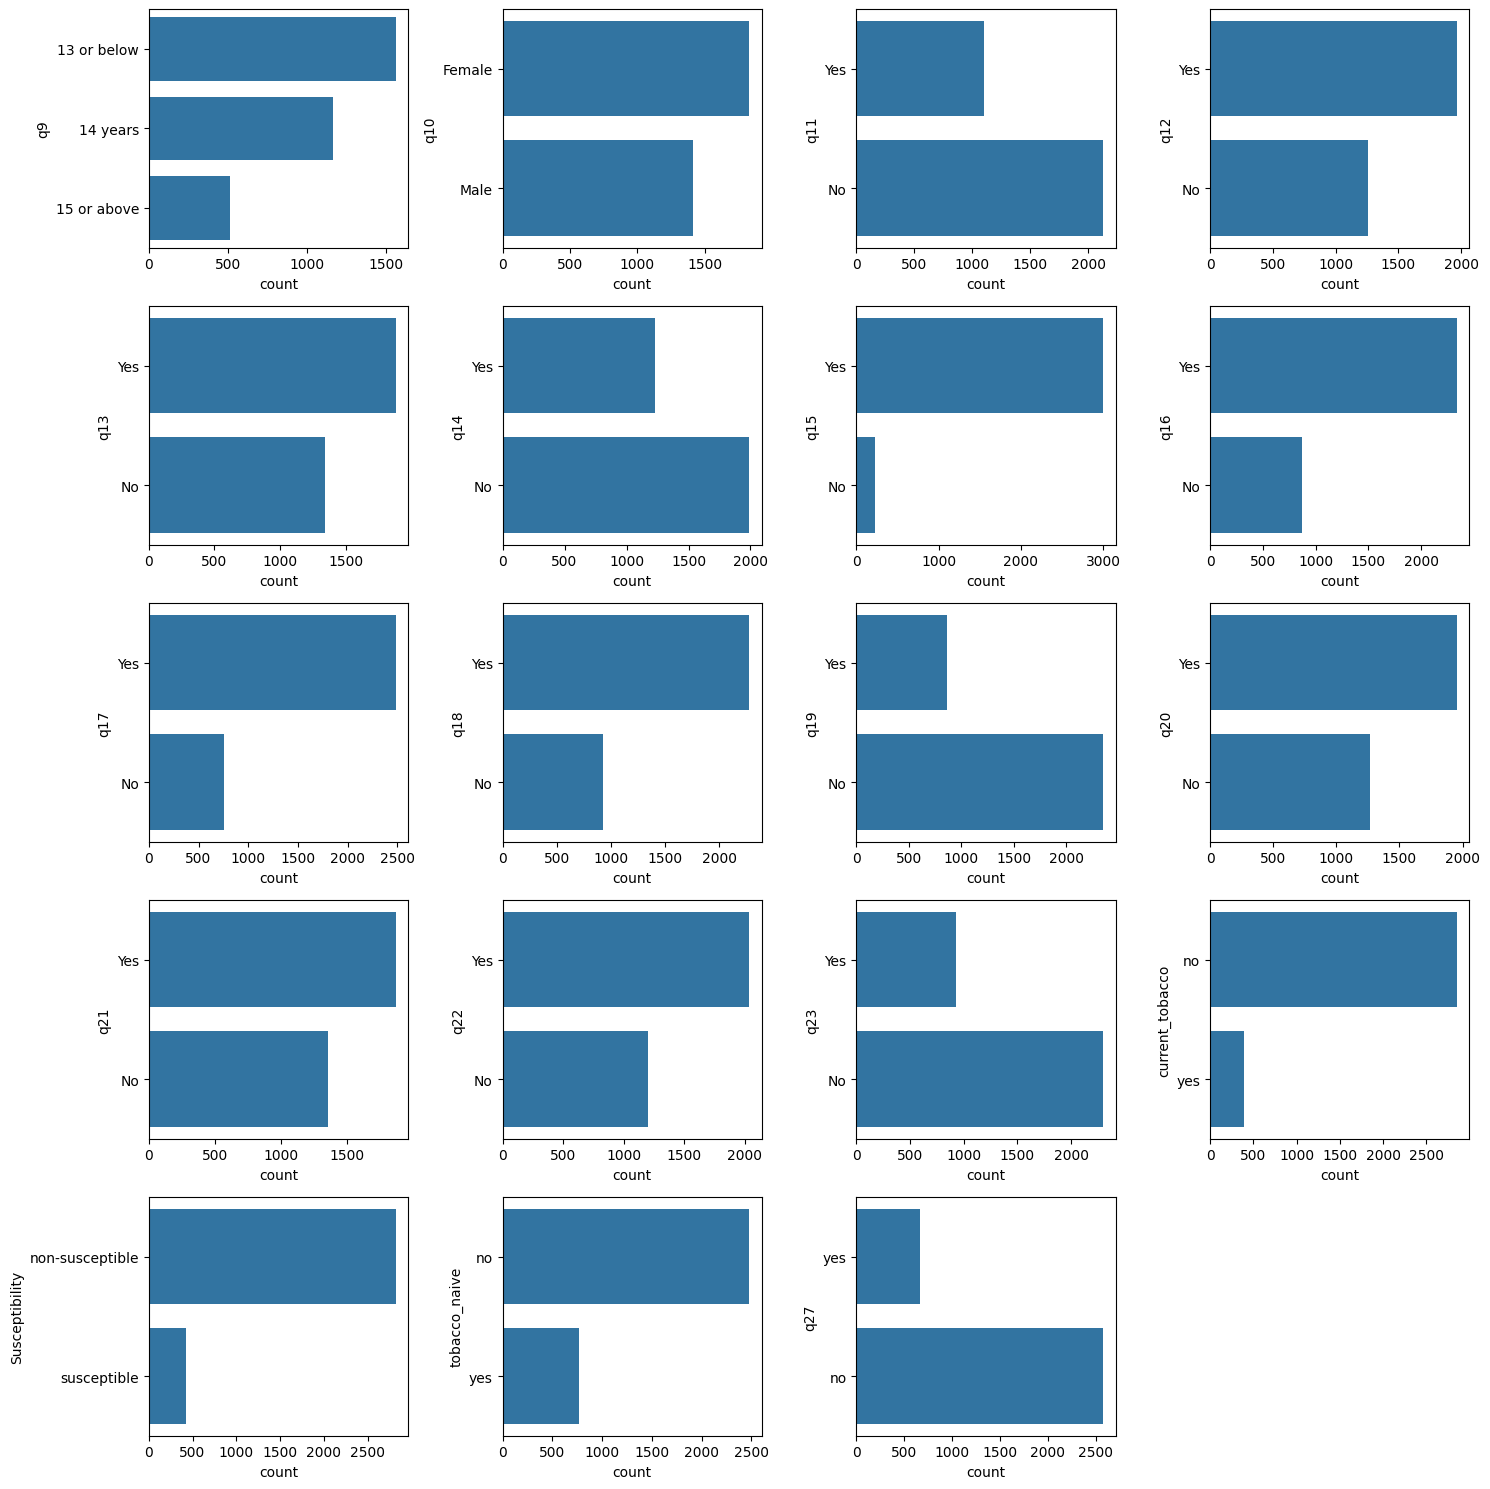

In [6]:
plt.figure(figsize= (15,15))
for i in range(len(df.columns)):
    plt.subplot(5,4,i+1)
    sns.countplot(df[df.columns[i]])
    plt.tight_layout()

In [7]:
df.duplicated().sum()
df = df.drop_duplicates()

In [8]:
X = df.drop(columns = ['current_tobacco','Susceptibility','tobacco_naive'])
y = df['Susceptibility']
y = np.where(y == 'non-susceptible', 0, 1)

In [9]:
cat_columns = ['q9','q10','q11','q12','q13','q14','q15','q16',
              'q17','q18','q19','q20','q21','q22','q23','q27']

pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',pipeline, cat_columns)
    ],
    remainder='passthrough'
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
from imblearn.over_sampling import SMOTE
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state= 42)
smote = SMOTE(random_state= 42)
X_train,y_train = smote.fit_resample(X_train,y_train)

In [12]:
def evaluate_clf(true,predicted):
    acc = accuracy_score(true,predicted)
    f1 = f1_score(true,predicted)
    precision = precision_score(true,predicted)
    recall = recall_score(true,predicted)
    roc_auc = roc_auc_score(true,predicted)
    
    return acc, f1, precision, recall, roc_auc

In [13]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier()
}

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [15]:
def evaluate_model(X_train, X_test, y_train, y_test, models, cv=5):
    model_list    = []
    accuracy_list = []
    cv_score_list = []

    for model_name, model in models.items():

        # Build pipeline: preprocessor + scaler + model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('scaler'       , StandardScaler(with_mean=False)),
            ('model'        , model)
        ])

        # Cross-validation on training data
        cv_scores = cross_val_score(pipeline, X_train, y_train,
                                    cv=cv, scoring='accuracy')

        # Fit on full training set
        pipeline.fit(X_train, y_train)

        y_train_pred = pipeline.predict(X_train)
        y_test_pred  = pipeline.predict(X_test)

        # Metrics
        model_train_accuracy, model_train_f1, model_train_precision, \
            model_train_recall, model_train_rocauc = evaluate_clf(y_train, y_train_pred)

        model_test_accuracy, model_test_f1, model_test_precision, \
            model_test_recall, model_test_rocauc  = evaluate_clf(y_test,  y_test_pred)

        # Print report
        print(model_name)
        print(f'Cross-Validation Accuracy ({cv}-Fold): '
              f'{cv_scores.mean():.4f} ± {cv_scores.std():.4f}')
        print('Model performance for Training set')
        print('- Accuracy      : {:.4f}'.format(model_train_accuracy))
        print('- F1 Score      : {:.4f}'.format(model_train_f1))
        print('- Precision     : {:.4f}'.format(model_train_precision))
        print('- Recall        : {:.4f}'.format(model_train_recall))
        print('- ROC AUC Score : {:.4f}'.format(model_train_rocauc))
        print('-------------------------------------')
        print('Model performance for Test set')
        print('- Accuracy      : {:.4f}'.format(model_test_accuracy))
        print('- F1 Score      : {:.4f}'.format(model_test_f1))
        print('- Precision     : {:.4f}'.format(model_test_precision))
        print('- Recall        : {:.4f}'.format(model_test_recall))
        print('- ROC AUC Score : {:.4f}'.format(model_test_rocauc))
        print('=' * 35)
        print('\n')

        model_list.append(model_name)
        accuracy_list.append(model_test_accuracy)
        cv_score_list.append(round(cv_scores.mean(), 4))

    report = pd.DataFrame({
        'Model Name'            : model_list,
        'Test Accuracy'         : accuracy_list,
        f'CV Accuracy ({cv}-Fold)': cv_score_list
    }).sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)

    return report

In [16]:

model_report = evaluate_model(X_train, X_test, y_train, y_test, models, cv=5)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/imran/Desktop/Nayeem/Youth-Tobacco-Survey/ml_venv/lib/python3.13/site-packages/sklearn/utils/_indexing.py", line 446, in _get_column_indices
    all_columns = X.columns
                  ^^^^^^^^^
AttributeError: 'numpy.ndarray' object has no attribute 'columns'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/imran/Desktop/Nayeem/Youth-Tobacco-Survey/ml_venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/imran/Desktop/Nayeem/Youth-Tobacco-Survey/ml_venv/lib/python3.13/site-packages/sklearn/base.py", line 1336, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/imran/Desktop/Nayeem/Youth-Tobacco-Survey/ml_venv/lib/python3.13/site-packages/imblearn/pipeline.py", line 514, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/imran/Desktop/Nayeem/Youth-Tobacco-Survey/ml_venv/lib/python3.13/site-packages/imblearn/pipeline.py", line 426, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ~~~~~~~~~~~~~~~~~~~~~~~~^
        cloned_transformer,
        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
        params=step_params,
        ^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/home/imran/Desktop/Nayeem/Youth-Tobacco-Survey/ml_venv/lib/python3.13/site-packages/joblib/memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/home/imran/Desktop/Nayeem/Youth-Tobacco-Survey/ml_venv/lib/python3.13/site-packages/imblearn/pipeline.py", line 1379, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "/home/imran/Desktop/Nayeem/Youth-Tobacco-Survey/ml_venv/lib/python3.13/site-packages/sklearn/utils/_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/imran/Desktop/Nayeem/Youth-Tobacco-Survey/ml_venv/lib/python3.13/site-packages/sklearn/base.py", line 1336, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/imran/Desktop/Nayeem/Youth-Tobacco-Survey/ml_venv/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py", line 991, in fit_transform
    self._validate_column_callables(X)
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^
  File "/home/imran/Desktop/Nayeem/Youth-Tobacco-Survey/ml_venv/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py", line 545, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
  File "/home/imran/Desktop/Nayeem/Youth-Tobacco-Survey/ml_venv/lib/python3.13/site-packages/sklearn/utils/_indexing.py", line 448, in _get_column_indices
    raise ValueError(
        "Specifying the columns using strings is only supported for dataframes."
    )
ValueError: Specifying the columns using strings is only supported for dataframes.
